In [1]:
from askmendel.services.load_dataset import download_dataset
from askmendel.services.mendel import AskMendel

from askmendel.services.read_configs import read_configs
from askmendel.services.base_pipeline import run_pipeline
from askmendel.services.mendel import ask_mendel_for_plan, ask_mendel_for_result

configs = read_configs()

In [2]:
# Load dataset
adata = download_dataset()

Filtering cells...
Filtering genes...
Calculating QC metrics...


/home/codespace/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


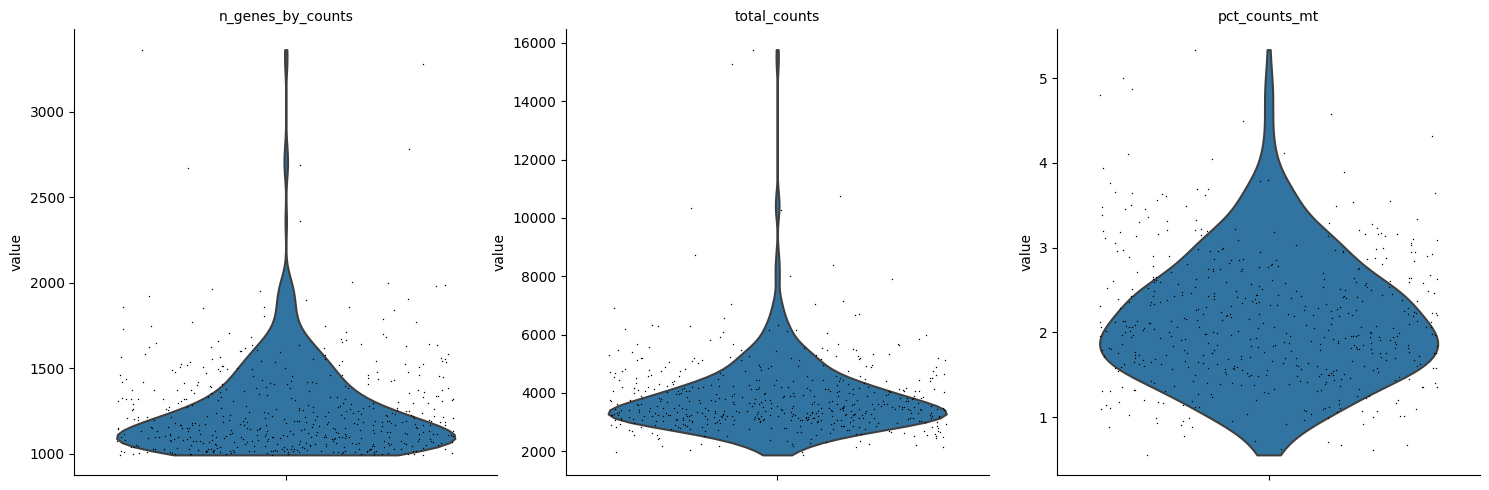

<Figure size 640x480 with 0 Axes>

In [3]:
run_pipeline(adata, configs, show_plots=True)

In [4]:
prompt = "Can you plot `n_genes_by_counts` against `total_counts` in a scatter plot?"
plan = ask_mendel_for_plan(
    adata=adata,
    prompt=prompt
)

In [5]:
print(plan)

- Extract the `n_genes_by_counts` and `total_counts` columns from the metadata of the `adata` object.
- Create a scatter plot with `n_genes_by_counts` on the x-axis and `total_counts` on the y-axis.
- Label the x-axis as "Number of Genes" and the y-axis as "Total Counts".
- Add a title to the plot.
- Show the plot.


In [9]:
prompt = "Can you only keep cells with `total_counts` less than 2000 and remove everything else?"
plan = ask_mendel_for_plan(
    adata=adata,
    prompt=prompt
)

In [10]:
print(plan)

To keep cells with `total_counts` less than 2000 and remove everything else, we can follow these steps:

1. Calculate the total counts for each cell by summing the expression values across all genes.
2. Filter the cells based on the total counts, keeping only the cells with a total count less than 2000.
3. Remove the filtered cells from the dataset, resulting in a new dataset with only the desired cells.


In [11]:
altered_plan = """
    1. Filter the cells based on the total counts, keeping only the cells with a total count less than 2000.
    2. Remove the filtered cells from the dataset, resulting in a new dataset with only the desired cells.
    3. Return the `adata` object.
"""
mendel = ask_mendel_for_result(
    adata,
    prompt,
    plan=altered_plan
)